<center><h1> Testing Dimensionality Reduction Techniques with Fashion-MNIST Dataset
<center><h6> Aditya Subramanian

In [86]:
#import necessary packages
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, save, show
from bokeh.models import ColumnDataSource
import seaborn as sns
import pandas as pd
import umap
import umap.plot

In [38]:
#settings
%matplotlib inline
sns.set_theme(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [135]:
#load F-MNIST dataset
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')
fmnist.data.shape

(70000, 784)

<center><h1> Testing UMAP with Fashion-MNIST Dataset

In [ ]:
#variables for following code block parameters
umap_rows = 30000
umap_seed = 42
neighbors = 20
umap_components = 2

In [ ]:
#fit UMAP model, set to a specific seed, with subsection of fminst dataset
mapper = umap.UMAP(random_state = umap_seed, n_neighbors = neighbors, n_components = umap_components).fit(fmnist.data[:umap_rows])

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [177]:
#set indices to a specific item for hover data
hover_data = pd.DataFrame({'index':np.arange(umap_rows), 'label': fmnist.target[:umap_rows]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

In [ ]:
#variables for following code block parameters
point_size_umap = 2

In [ ]:
# interactive plot of UMAP projection with label set to f-mnist targets and theme set to 'fire' for clear visualization
umap.plot.output_notebook()
#output_file("interactive_fmnist.html")
plot = umap.plot.interactive(mapper, labels=fmnist.target[:umap_rows], hover_data=hover_data, point_size = point_size_umap)
plot.title.text = "Umap projection of FMNIST dataset"
umap.plot.show(plot)


Loading BokehJS ...

When experimenting with n_neighbors, it appears that a larger n_neighbors is better for larger datasets, to form clearer clusters

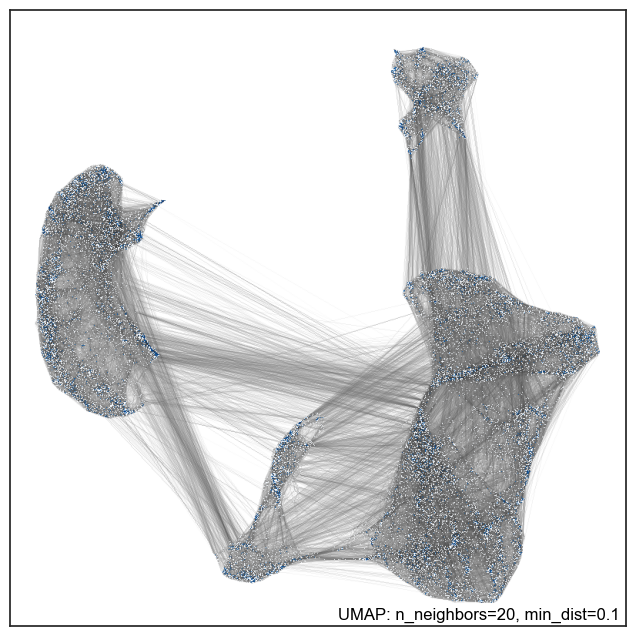

In [203]:
#umap connectivity plot
plot = umap.plot.connectivity(mapper, show_points=True)


<center><h1> Testing PCA with Fashion-MNIST Dataset

In [180]:
#additional necessary imports
from sklearn.decomposition import PCA

In [ ]:
# Standardize features
StandardScaler().fit_transform(fmnist.data[umap_rows])

array([[-9.18194873e-03, -2.14924366e-02, -3.51438659e-02, ...,
        -1.55097946e-01, -8.99411358e-02, -3.47281565e-02],
       [-9.18194873e-03, -2.14924366e-02, -3.51438659e-02, ...,
        -1.55097946e-01, -8.99411358e-02, -3.47281565e-02],
       [-9.18194873e-03, -2.14924366e-02, -3.51438659e-02, ...,
        -1.55097946e-01, -8.99411358e-02, -3.47281565e-02],
       ...,
       [-9.18194873e-03, -2.14924366e-02, -3.51438659e-02, ...,
        -1.55097946e-01, -8.99411358e-02, -3.47281565e-02],
       [-9.18194873e-03, -2.14924366e-02, -3.51438659e-02, ...,
        -9.67568173e-02, -8.99411358e-02, -3.47281565e-02],
       [-9.18194873e-03, -2.14924366e-02, -3.51438659e-02, ...,
         7.60427218e+00,  1.29573967e+01,  1.15760571e+01]])

In [ ]:
#variables for following code block parameters
pca_components = 2
pca_rows = 30000

In [ ]:
#apply pca and store principle components in dataframe
pca = PCA(n_components = pca_components)
principal_components = pca.fit_transform(fmnist.data[:pca_rows])
principle_component_MNIST = pd.DataFrame(data = principal_components , columns = ['principal component 1', 'principal component 2'])

In [197]:
#add target to the dataframe
principle_component_MNIST['target'] = fmnist.target[:pca_rows]
#map clothing items
principle_component_MNIST['target'] = principle_component_MNIST['target'].map({
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    })

In [ ]:
#variables for following code block parameters

#figure dimensions
x = 10
y = 10

#subplot dimensions
sub_rows = 1
sub_cols = 1
sub_index = 1

#font sizes
axis_label_size = 15
title_size = 20
legend_size = 10

#points
point_size_pca = 1

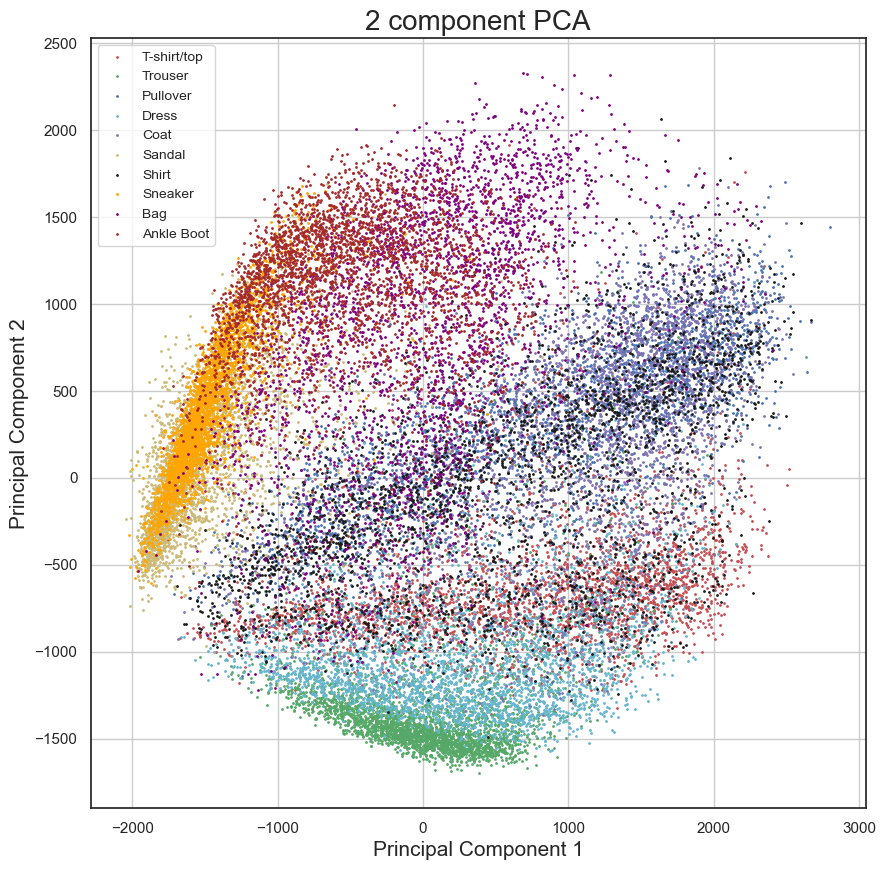

In [ ]:
#set up figure
fig = plt.figure(figsize = (x,y))
ax = fig.add_subplot(sub_rows, sub_cols, sub_index) 
ax.set_xlabel('Principal Component 1', fontsize = axis_label_size)
ax.set_ylabel('Principal Component 2', fontsize = axis_label_size)
ax.set_title('2 component PCA', fontsize = title_size)

#set colors
targets = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle Boot']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

#graph
for target, color in zip(targets, colors):
    indicesToKeep = principle_component_MNIST['target'] == target
    ax.scatter(principle_component_MNIST.loc[indicesToKeep, 'principal component 1'], 
            principle_component_MNIST.loc[indicesToKeep, 'principal component 2'], 
            c=color, s = point_size_pca)

ax.legend(targets, fontsize = legend_size)
ax.grid()

<center><h1> Testing Decision Tree Without Dimension Reduction

In [219]:
#variables for following code block parameters
proportion_for_testing = 0.2
split_seed = 1

In [ ]:
#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(fmnist.data[:umap_rows], hover_data['item'], test_size = proportion_for_testing, random_state = split_seed)

In [210]:
#imports for decision tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [209]:
#fit into decision tree
dc_tree = DecisionTreeClassifier()
dc_tree = dc_tree.fit(X_train, y_train)

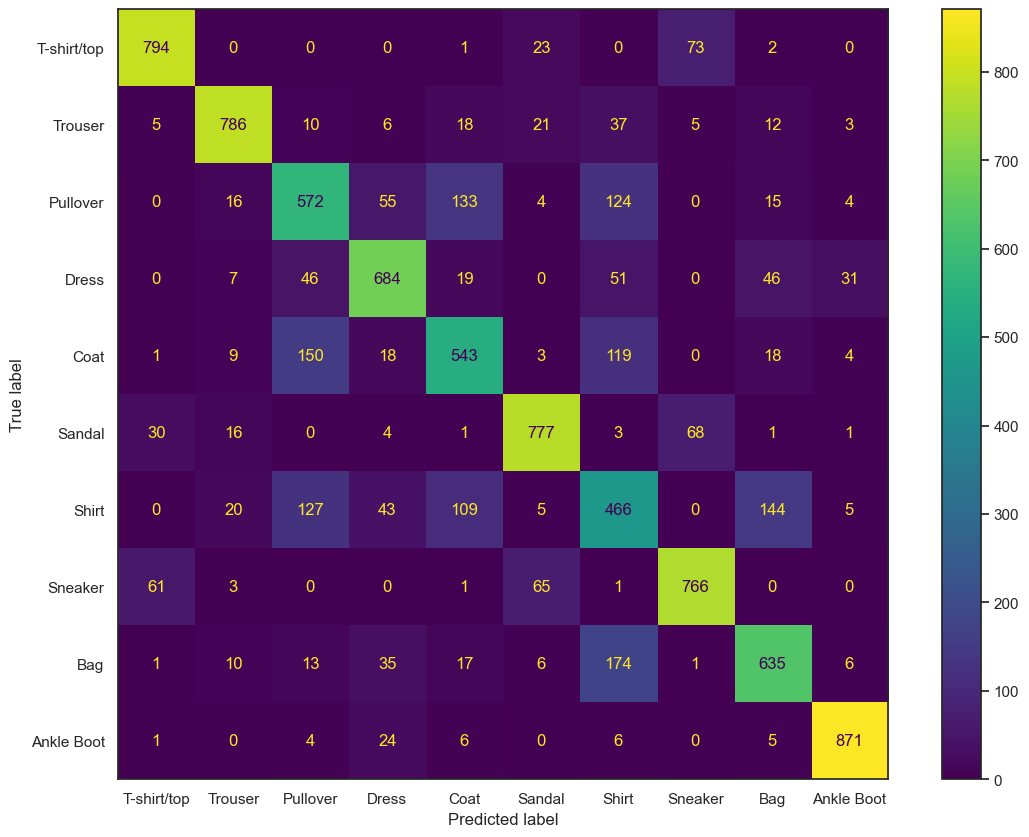

In [212]:
#seperate into predicted an actual values to create confusion matrix
y_predictions = dc_tree.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle Boot'])

cm_display.plot()
plt.show()


In [215]:
#Print precision
print(metrics.precision_score(y_test, y_predictions, average = 'weighted'))

0.7679363420601274


<center><h1> Testing Decision Tree With Dimension Reduction

In [225]:
#fit and transform umap data
reducer = umap.UMAP(random_state = 3, n_neighbors = 50, n_components = 100).fit(fmnist.data[:umap_rows])
embedded_data = reducer.fit_transform(fmnist.data[:umap_rows])

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [226]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(embedded_data, hover_data['item'], test_size = proportion_for_testing, random_state = split_seed)

In [228]:
#fit into decision tree
dc_tree_reduced = DecisionTreeClassifier()
dc_tree_reduced = dc_tree_reduced.fit(X_train_r, y_train_r)

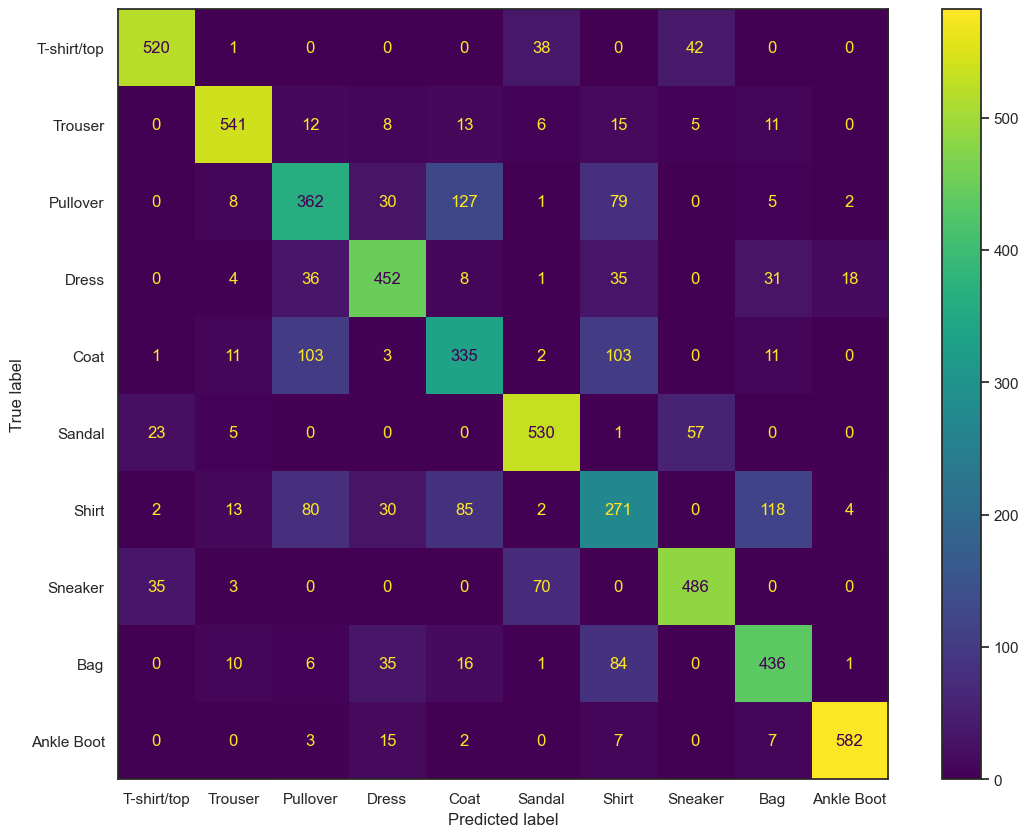

In [229]:
#seperate into predicted an actual values to create confusion matrix
y_predictions_r = dc_tree_reduced.predict(X_test_r)

confusion_matrix = metrics.confusion_matrix(y_test_r, y_predictions_r)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle Boot'])

cm_display.plot()
plt.show()


In [232]:
#print accuracy
print(metrics.precision_score(y_test_r, y_predictions_r, average = 'weighted'))

0.7533888018499229


##### Sources:
##### https://umap-learn.readthedocs.io/en/latest/index.html
##### https://builtin.com/machine-learning/pca-in-python
##### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
##### https://www.w3schools.com/python/python_ml_confusion_matrix.asp
